### Situation
Have you ever hopped on a scooter and realized the battery is dead? 😣 What an upsetting experience!

In order to prevent that horrible user experience from happening, the data science team is focusing its efforts on coming up with the best scooter charging strategy.

You can find a data set below with scooters’ current geolocation and power level. Power level ranges from 0 - 5 (0 as completely out of battery, 5 as fully charged). It takes 5 hours to charge a scooter’s power from 0 to 5. TechPointX talent team also has a mega charging bus that drives around to pick up scooters and charge them inside. Unfortunately, the bus can only park and start at location 20.19 (xcoordinate), 20.19 (ycoordinate) and only travel 50 miles per hour.

### Your Task
Review the data set, and draw any conclusions you can find from the data set. Try to identify the most popular scooter location, demonstrate your findings using data visualization tools, calculate operation time cost (Operation Time Cost: How long it takes to fully charge all the scooters), and come up with the most efficient scooter charging strategy.

In [15]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from sklearn.cluster import KMeans

Let's start by reading data.

In [2]:
scooter_data = pd.read_csv("2019-XTern- Work Sample Assessment Data Science-DS.csv")
scooter_data

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1
3,3,0.906752,0.804461,0
4,4,0.900641,0.781683,4
5,5,0.899680,0.790893,2
6,6,0.873765,0.808707,4
7,7,0.913476,0.789742,5
8,8,0.915256,0.790685,4
9,9,0.916273,0.785860,5


To understand the scooters location and how they are spread, scatter plot has been created. Different colors have been picked for different power levels.

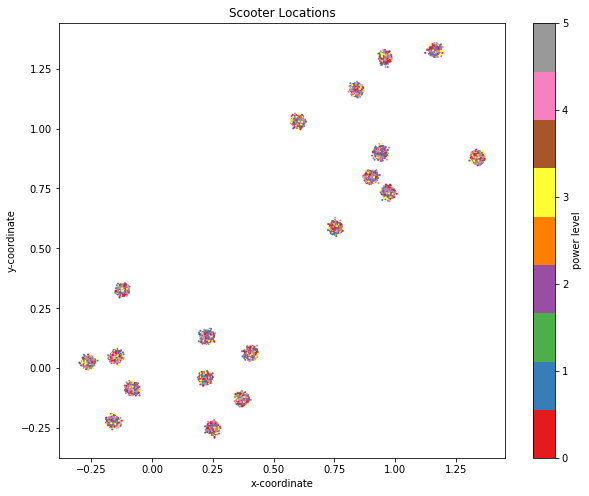

In [3]:
plt.figure(figsize=(10, 8))
plt.scatter(scooter_data['xcoordinate'], scooter_data['ycoordinate'], marker='o', c = scooter_data['power_level'], 
            cmap = plt.get_cmap('Set1'), s = 1)
cbar = plt.colorbar()
plt.title('Scooter Locations')
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
cbar.ax.set_ylabel('power level', rotation=90)
plt.show() 

To understand the data better, a plot with number of scooters vs their power level has been drawn below.

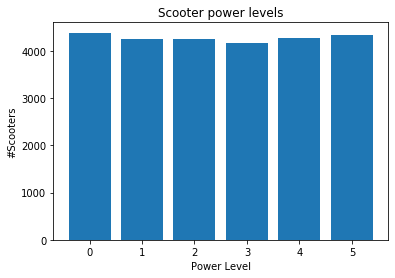

In [4]:
battery_levels = []
number_of_scooters = []
for battery_level in sorted(scooter_data['power_level'].unique()):
    battery_levels.append(battery_level)
    number_of_scooters.append(scooter_data[scooter_data['power_level'] == battery_level]['scooter_id'].count())

plt.bar(battery_levels, number_of_scooters)
plt.xlabel('Power Level')
plt.ylabel('#Scooters')
plt.title('Scooter power levels')
plt.show()

It can be observed that number of scooters per power level is almost same.

To cluster the scooters, we can directly divid into 19 clusters( by observing the data), however, we can verify it by plotting wcss with # of clusters.

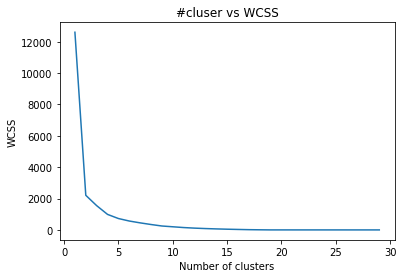

In [5]:
# Verifying number of cluster, should be approximtely 19
wcss = [] # Within-Cluster-Sum-of-Squares
X = scooter_data[['xcoordinate', 'ycoordinate']]
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('#cluser vs WCSS')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

WCSS is pretty much same after 19, therefore, n_cluster=19 for K means clustering algorithm.

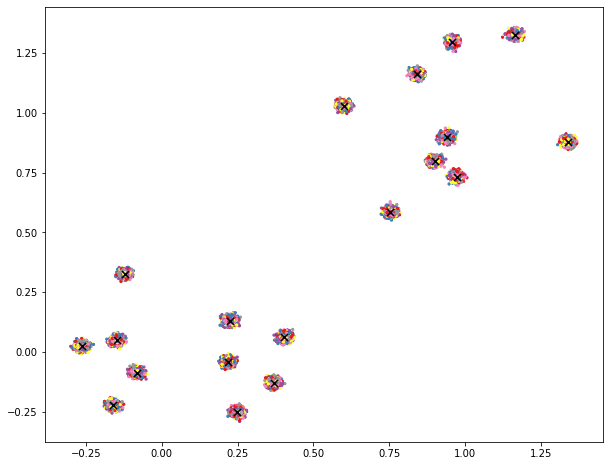

In [6]:
plt.figure(figsize=(10, 8))
Kmeans = KMeans(n_clusters=19)
X = scooter_data[['xcoordinate', 'ycoordinate']]
Kmeans.fit(X)
labels = Kmeans.predict(X)
centroids = Kmeans.cluster_centers_

plt.scatter(scooter_data['xcoordinate'], scooter_data['ycoordinate'], marker='o', c = scooter_data['power_level'], 
            cmap = plt.get_cmap('Set1'), s = 5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, s=50, c='black', marker = 'x')
plt.show()

To understand the most popular scooter location, lets plot the number of scooters in each cluster.

Text(0, 0.5, '# of scooter')

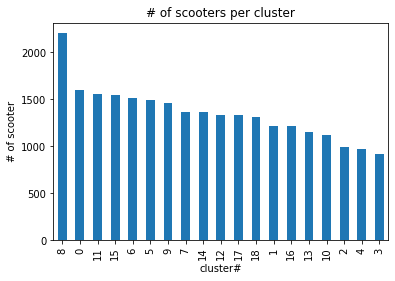

In [29]:
scooter_data.insert(0, 'cluster#', labels)
X = scooter_data[['cluster#', 'scooter_id','power_level']]
ax = X['cluster#'].value_counts().plot.bar(title = '# of scooters per cluster')
ax.set_xlabel("cluster#")
ax.set_ylabel("# of scooter")

Cluster number 8 has most number of scooters. Therefore, most popular location is x = 0.22556029, y = 0.13144752

### Assumptions for Optimal Scooter Charging Strategy
1. A completely charged scooter works entire day, i.e, a scooter at power level 5 can work entire day.
2. Therefore, each battery level works roughly around 24/5 = 4.8 hours
3. Let's assume the charging bus size is 1500.
4. Charging should take place at night, to avoid scooter shortage atleast in the most popular areas.

### Observations based on above assumptions
1. Anything with more than 2 power level is enough to cover half of the day.

### Strategy

1. First target scooters with power level 0, 1 and 2 from the cluster which is mid way in popularity, i.e, start from cluster 6 and work its was to the most popular cluster.
2. The benefit of this strategy will be that: by the time you reach the most popular cluster, you will already have some charged scooters which can be directly replaced. This would prevent the shortage of scooters at more popular locations at any point of time.
3. First round of charging will charge all scooter with power level 0,1 and 2. The second round will charge all scooters with power level 3, 4 and 5, which in a realistic world will now have less power than before making them ideal for pick up.

### For example: 
First round: power level [0, 1, 2]
1. The charging bus will first pick 1500 or less scooters from cluster 12 then to cluster 14, cluster 7, all the way to most popular cluster 8.
2. At each cluster, charging bus will drop the scooters which are charged and will pick up new scooters as per the capacity.
3. By the time it reaches cluster 8 (most popular), it will already have charged scooters to replace to avoid the shortage.
4. Once it reaches to cluster 8, it will continue its way from the least popular region (cluster 3), then to cluster 4, cluster 2, all the way to cluster 8.

Second Round: power level [3, 4]
1. At the end of round 1, charging bus reached back to cluster 8 and it will follow the same stragety as round 1. 
